In [ ]:
!pip install matplotlib


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import MultinomialNB


data base

In [ ]:
data = pd.read_csv('/content/language (2).csv')

In [ ]:
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [ ]:
data.isnull().sum()

,0
Text,0
language,0


In [ ]:
data['language'].value_counts()

,count
language,
Estonian,1000
Swedish,1000
Thai,1000
Tamil,1000
Dutch,1000
Japanese,1000
Turkish,1000
Latin,1000
Urdu,1000


In [ ]:
data.dtypes

,0
Text,object
language,object


In [ ]:
x = np.array(data['Text'])

In [ ]:
y = np.array(data['language'])

Vectorize the text data

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()


# Print model accuracy

In [ ]:
print("Model Accuracy:", model.score(X_test, y_test) *100)

Model Accuracy: 95.81818181818181


In [ ]:
# Show Language Distribution in Dataset

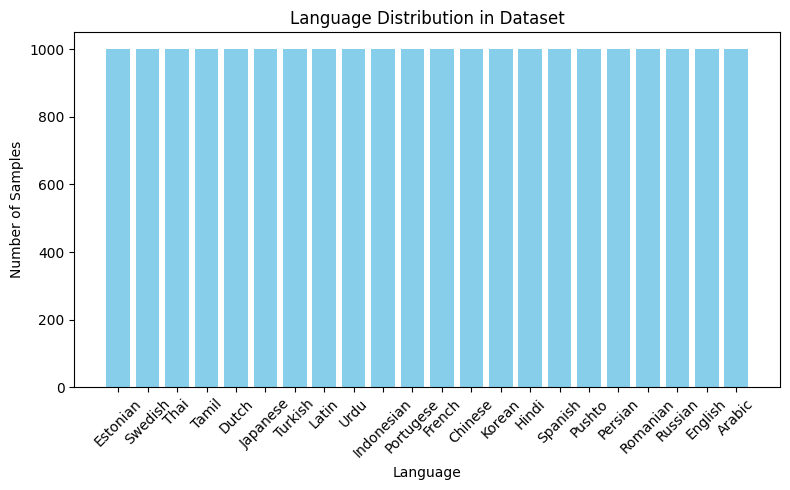

In [ ]:
def plot_language_distribution():
    lang_counts = data['language'].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(lang_counts.index, lang_counts.values, color='skyblue')
    plt.title("Language Distribution in Dataset")
    plt.xlabel("Language")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_language_distribution()

# Function to Detect Mixed Language Scripts

In [ ]:
def detect_mixed_languages(text):
    if re.search('[а-яА-Я]', text) and re.search('[a-zA-Z]', text):
        return True
    return False

# 📩 User input

In [ ]:
user = input("Enter a text: ")

Enter a text: hello, i am Ali Raza from pakistan


#Check if input is too short

In [ ]:
if len(user.strip()) < 3:
    print("Text too short to detect language. Please enter a longer sentence.")
else:
    # ⚠ Warn if mixed languages detected
    if detect_mixed_languages(user):
        print("⚠ Warning: Your input contains multiple language scripts. Prediction might be inaccurate.")

#Transform input

In [ ]:
 user_data = cv.transform([user]).toarray()

# Predict

In [ ]:
output = model.predict(user_data)
probabilities = model.predict_proba(user_data)
confidence = np.max(probabilities) * 100

# Print prediction resul

In [ ]:
print(f"\nPredicted Language: {output[0]}")
print(f"Confidence: {confidence:.2f}%")


Predicted Language: English
Confidence: 99.68%
